## Neural networks in Keras (Tensorflow)

TensorFlow is a software package from Google which is widely used in Machine learning. The package contains implementations of many neural network algorithms and network architectures. We interface with TensorFlow with a package called Keras which is included in TensorFlow.

Instructions for installing TensorFlow with Anaconda: https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
Start with the CPU-only version. If you run into installation problems or long running times, you should definitely consider Google's Colab: https://colab.research.google.com/ which has numpy, scikit, keras and many more packages pre-installed and provides free access to GPUs. You can upload this Jupyter notebook directly into Colab.

### Multi-layer networks used to classify the Fashion MNIST image data set

This data set is included in the Keras distribution. Note that we do not exploit the fact that the inputs are images and the prediction accuracy is therefore not as good as it can be.

There is a separate test set which is used to evaluate classifier accuracy. We set aside a part of the training data to monitor the training process and decide when to stop training (otherwise we may end up overfitting the training data)

In [1]:
import tensorflow as tf
import numpy as np

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

(x_tr, y_tr), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Flatten 28x28 images into a single vector
x_tr = x_tr.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# Set aside validation data for monitoring training progress
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=10000, \
                                                  random_state=42)

# Subtract mean and divide by *overall* standard deviation
mean = np.mean(x_train)
std = np.std(x_train) # a scalar value (*not* columnwise scaling)
x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (x_test - mean) / std

print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test.shape)

Training set: (50000, 784)
Validation set: (10000, 784)
Test set: (10000, 784)


### A feedforward network with a single hidden layer using sigmoid activations

A textbook example on how *not* to design a neural network (sigmoid's are bad, mkay).

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

num_classes=10
num_epochs=30
n_hidden=10 # Number of nodes in hidden layer
batch_size=256

# This is everything that is needed to build the network:
model = Sequential([
    Dense(n_hidden, 
    input_dim=x_train.shape[1]),
    Activation('sigmoid'),
    Dense(num_classes),
    Activation('softmax'), # Multi-class problem
])
model.summary()

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy', # Labels are integer valued
              metrics=['accuracy'])

history=model.fit(x_train, y_train, 
                  epochs=num_epochs, batch_size=batch_size,
                  verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 74us/sample - loss: 2.0260 - accuracy: 0.3602 - val_loss: 1.8444 - val_accuracy: 0.5212
Epoch 2/30
50000/50000 [=============================

In [4]:
history=model.fit(x_train, y_train, 
                  epochs=num_epochs, batch_size=batch_size,
                  verbose=1, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7457 - accuracy: 0.7417 - val_loss: 0.7564 - val_accuracy: 0.7386
Epoch 2/30
50000/50000 [==============================] - 2s 39us/sample - loss: 0.7384 - accuracy: 0.7432 - val_loss: 0.7493 - val_accuracy: 0.7409
Epoch 3/30
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7313 - accuracy: 0.7448 - val_loss: 0.7424 - val_accuracy: 0.7428
Epoch 4/30
50000/50000 [==============================] - 2s 41us/sample - loss: 0.7245 - accuracy: 0.7468 - val_loss: 0.7357 - val_accuracy: 0.7440
Epoch 5/30
50000/50000 [==============================] - 2s 44us/sample - loss: 0.7178 - accuracy: 0.7487 - val_loss: 0.7292 - val_accuracy: 0.7461
Epoch 6/30
50000/50000 [==============================] - 2s 45us/sample - loss: 0.7114 - accuracy: 0.7511 - val_loss: 0.7228 - val_accuracy: 0.7488
Epoch 7/30
50000/50000 [==============================] 

### Monitoring the loss function and model accuracy during training

"[Loss functions] are a window to your model's heart" - A. Karpathy https://lossfunctions.tumblr.com/

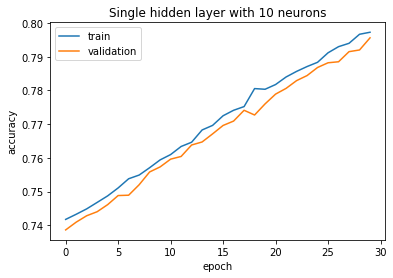

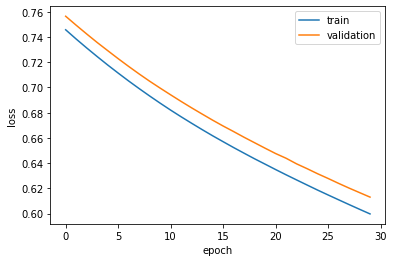

In [5]:
# Training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Single hidden layer with {} neurons'.format(n_hidden))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### A network with two hidden layers and ReLU activations

In [6]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
num_epochs = 10
n_hidden = 512

model = Sequential()
model.add(Dense(n_hidden, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.2)) # Dropout regularization
model.add(Dense(n_hidden, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 43

### Corresponding loss and accuracy values

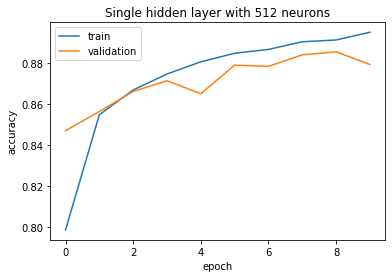

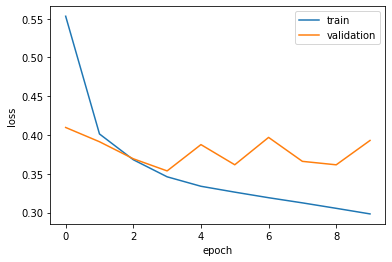

In [7]:
# Training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Single hidden layer with {} neurons'.format(n_hidden))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Convolutional neural networks (CNNs)

CNNs are specialized neural networks for the image processing. They were originally designed for classification but are now used in many image processing tasks.

NB This particular network is not super accurate. With sufficient training it acheives around 90% accuracy. Human accuracy is around 84% (non fashion experts). More sophisticated networks achieve more than 96% accuracy.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta

num_epochs = 10 # Increase to get improved accuracy
batch_size = 128
num_classes = 10
img_rows, img_cols = 28, 28 # input image dimensions

# Reshape, the 4th axis is the color band, here we have only one
# band since the images are grayscale
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # Dense layer at the end
model.add(Dropout(0.5)) # Dropout in the final layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=num_epochs,
                  verbose=1,
                  validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (50000, 28, 28, 1)
50000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_______________________________________________

KeyboardInterrupt: 

If you are using Google Colab, go to Runtime/Change runtime type. Select "GPU" and run the above code again. You should notice a significant speedup. Increase the number of epochs to improve accuracy.

### Loss and accuracy during training

In [ ]:
# Visualize training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Convolutional neural network')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()